In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [2]:
# Load the data
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Analysis of Variance (ANOVA)

#### Anova analysis more than two groups, mean or average of more than 2 groups are statistically different or not. 
#### In Z-test or T-test we compare average of 2 groups.

#### Anova compare the averages of the numerical variables of more than two categories of a categorical variable

#### 2 or more Categorical and 1 Continous Dependent variable

* One-Way Anova: Compares feature with Single independent factor (Categorical) to Single Dependent variable (Continous)
* Two-Way Anova: Compares feature with Two ore more independent factor (Categorical) to Single Dependent variable (Continous)

## What Anova Does?

* Low within group variability and high between group variability produces significant effect
* High within group variability and low between group variability produces no effect


## 1. Hypothesis Testing - ONE - WAY ANOVA
* HO: Carbody is not signifant feture for price
* H1: Carbody is significant

<AxesSubplot:xlabel='carbody', ylabel='price'>

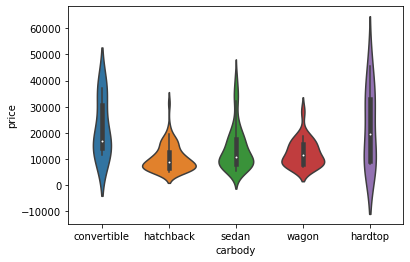

In [3]:
# Visual Representation
sns.violinplot(x = data.carbody, y = data.price)

#### Here we can see difference in Car Price by Body

In [4]:
model = ols("price ~ carbody", data = data).fit()
anova_table =  anova_lm(model, typ = 2)
print(anova_table)

                sum_sq     df         F    PR(>F)
carbody   1.801997e+09    4.0  8.031976  0.000005
Residual  1.121764e+10  200.0       NaN       NaN


#### p-value = 0.000005, Car Body is Significant feature

## 2. Hypothesis Testing - ONE - WAY ANOVA
* Ho: Engine Location is not significant feature
* H1: Engine Location has significant impact
    

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

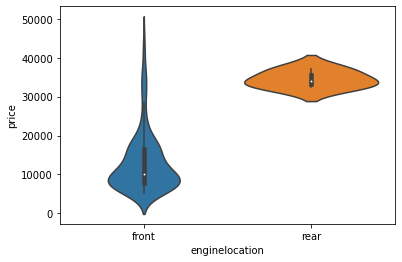

In [5]:
# Visual Representation 
sns.violinplot(x = data.enginelocation, y = data.price)

#### Here we can see significant difference in Car Price by the Engline location, Lets confirm the same statistically

In [6]:
model = ols('price ~ enginelocation', data = data).fit()
anova_table = anova_lm(model, typ = 2)
print(anova_table)

                      sum_sq     df         F    PR(>F)
enginelocation  1.374973e+09    1.0  23.96974  0.000002
Residual        1.164467e+10  203.0       NaN       NaN


#### p = 0.000002 < 0.05, we can reject the Null Hypothesis, Hence Engine Location impacts Car Price

## 3. Hypothesis Testing - ONE - WAY ANOVA
* H0: There is no significant difference in fuelsystem & price
* H1: There is significant impact by fuelsystem

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

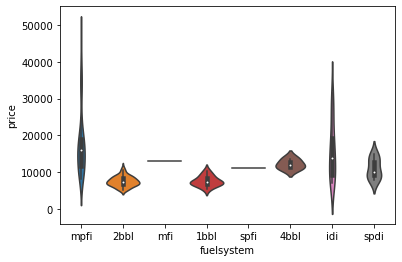

In [7]:
sns.violinplot(x = data.fuelsystem, y = data.price)

In [8]:
model = ols('price ~ fuelsystem', data = data).fit()
anova_table = anova_lm(model, typ = 2)
print(anova_table)

                  sum_sq     df          F        PR(>F)
fuelsystem  4.651199e+09    7.0  15.641865  2.990386e-16
Residual    8.368441e+09  197.0        NaN           NaN


#### p = 2.990386e-16 < 0.05, we can reject the Null Hypothesis, Hence Fuel System impacts Car Price

## 4. Hypothesis Testing - TWO WAY ANOVA
* H0: There is no significant difference by doornumber & carbody
* H1: There is significant impact by carbody & door number on car price

In [9]:
model = ols('price ~ carbody + doornumber + carbody * doornumber', data = data).fit()
anova_table = anova_lm(model, typ = 2)
print(anova_table)

                          sum_sq     df          F        PR(>F)
carbody             6.382493e+09    4.0  28.309879  2.813637e-15
doornumber                   NaN    1.0        NaN           NaN
carbody:doornumber  1.784052e+09    4.0   7.913256  5.189989e-05
Residual            1.115983e+10  198.0        NaN           NaN


D:\Program Files\Anaconda\envs\MallCustomer-Clustering\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
D:\Program Files\Anaconda\envs\MallCustomer-Clustering\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
D:\Program Files\Anaconda\envs\MallCustomer-Clustering\lib\site-packages\statsmodels\base\model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J
D:\Program Files\Anaconda\envs\MallCustomer-Clustering\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not h

#### p = 0.000006 < 0.05, we can reject the Null Hypothesis, Hence there is significant impact by carbody & door number on car price